### Langraph Persistence

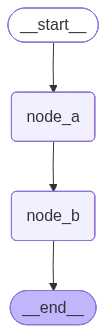

{'foo': 'b', 'bar': ['a', 'b']}

In [12]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.runnables import RunnableConfig
from typing import Annotated
from typing_extensions import TypedDict
from operator import add
from IPython.display import Image


class State(TypedDict):
    foo: str
    bar: Annotated[list[str], add]

def node_a(state: State):
    return {"foo": "a", "bar": ["a"]}

def node_b(state: State):
    return {"foo": "b", "bar": ["b"]}


workflow = StateGraph(State)
workflow.add_node(node_a)
workflow.add_node(node_b)
workflow.add_edge(START, "node_a")
workflow.add_edge("node_a", "node_b")
workflow.add_edge("node_b", END)

checkpointer = InMemorySaver()
graph = workflow.compile(checkpointer=checkpointer)

# Show the agent
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


config: RunnableConfig = {"configurable": {"thread_id": "1"}}
graph.invoke({"foo": ""}, config)

In [13]:
# get the latest state snapshot
config = {"configurable": {"thread_id": "1"}}
graph.get_state(config)

StateSnapshot(values={'foo': 'b', 'bar': ['a', 'b']}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8a68-d1af-6e54-8002-cb8741ae0bb3'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-14T02:36:13.387929+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8a68-d1ae-6c02-8001-980d197524ea'}}, tasks=(), interrupts=())

In [15]:
# get a state snapshot for a specific checkpoint_id
config = {"configurable": {"thread_id": "1", "checkpoint_id": "1f0a8a68-d1af-6e54-8002-cb8741ae0bb3"}}
graph.get_state(config)

StateSnapshot(values={'foo': 'b', 'bar': ['a', 'b']}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0a8a68-d1af-6e54-8002-cb8741ae0bb3'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-14T02:36:13.387929+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8a68-d1ae-6c02-8001-980d197524ea'}}, tasks=(), interrupts=())

In [16]:
# Get state history
config = {"configurable": {"thread_id": "1"}}
list(graph.get_state_history(config))

[StateSnapshot(values={'foo': 'b', 'bar': ['a', 'b']}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8a68-d1af-6e54-8002-cb8741ae0bb3'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-14T02:36:13.387929+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8a68-d1ae-6c02-8001-980d197524ea'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'foo': 'a', 'bar': ['a']}, next=('node_b',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8a68-d1ae-6c02-8001-980d197524ea'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-14T02:36:13.387460+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8a68-d1ad-68f2-8000-48d840db4cda'}}, tasks=(PregelTask(id='a0aaca8e-145d-76bd-ca7a-2de660fcd73d', name='node_b', path=('__pregel_pull', 'node_b'), error=None, interrupts

In [9]:
# Memory Store
from langgraph.store.memory import InMemoryStore
import uuid


in_memory_store = InMemoryStore()

user_id = "1"
namespace_for_memory = (user_id, "memories")

memory_id = str(uuid.uuid4())
memory = {"food_preference" : "I like pizza"}
in_memory_store.put(namespace_for_memory, memory_id, memory)

memories = in_memory_store.search(namespace_for_memory)
memories[-1].dict()
{'value': {'food_preference': 'I like pizza'},
 'key': '07e0caf4-1631-47b7-b15f-65515d4c1843',
 'namespace': ['1', 'memories'],
 'created_at': '2024-10-02T17:22:31.590602+00:00',
 'updated_at': '2024-10-02T17:22:31.590605+00:00'}


{'value': {'food_preference': 'I like pizza'},
 'key': '07e0caf4-1631-47b7-b15f-65515d4c1843',
 'namespace': ['1', 'memories'],
 'created_at': '2024-10-02T17:22:31.590602+00:00',
 'updated_at': '2024-10-02T17:22:31.590605+00:00'}

In [17]:
# View the history of the thread

config = {
    "configurable": {
        "thread_id": "1"
    }
}
list(graph.get_state_history(config))

[StateSnapshot(values={'foo': 'b', 'bar': ['a', 'b']}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8a68-d1af-6e54-8002-cb8741ae0bb3'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-10-14T02:36:13.387929+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8a68-d1ae-6c02-8001-980d197524ea'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'foo': 'a', 'bar': ['a']}, next=('node_b',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8a68-d1ae-6c02-8001-980d197524ea'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-10-14T02:36:13.387460+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8a68-d1ad-68f2-8000-48d840db4cda'}}, tasks=(PregelTask(id='a0aaca8e-145d-76bd-ca7a-2de660fcd73d', name='node_b', path=('__pregel_pull', 'node_b'), error=None, interrupts

In [18]:
# Delete all checkpoints for a thread

thread_id = "1"
checkpointer.delete_thread(thread_id)

In [19]:
list(graph.get_state_history(config))

[]